<a href="https://colab.research.google.com/github/Siddhu44-DS/Data-Analyst-Portfolio/blob/main/Business_Case_Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Business Case: Walmart - Confidence Interval and CLT**

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

Features of the dataset:


User_ID:	User ID

Product_ID:	Product ID

Gender:	Sex of User

Age:	Age in bins

Occupation:	Occupation(Masked)

City_Category:	Category of the City (A,B,C)

StayInCurrentCityYears:	Number of years stay in current city

Marital_Status:	Marital Status

ProductCategory:	Product Category (Masked)

Purchase:	Purchase Amount

In [ ]:
!gdown --output walmart_data.csv 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094'


Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 159MB/s]


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [ ]:
# Load the dataset
df = pd.read_csv('walmart_data.csv')

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.shape

(550068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


From the above analysis, it is clear that, data has total of 10 features with lots of mixed alpha numeric data.

Apart from Purchase Column, all the other data types are of categorical type. We will change the datatypes of all such columns to category

In [ ]:
# Changing the Datatype of Columns
for i in df.columns[:-1]:
    df[i] = df[i].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


In [ ]:
# Statistical Summary
df.describe(include = 'category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


1. User_ID - Among 5,50,068 transactions there are 5891 unique user_id, indicating same customers buying multiple products.

2. Product_ID - Among 5,50,068 transactions there are 3631 unique products,with the product having the code P00265242 being the highest seller, with a maximum of 1,880 units sold.

3. Gender - Out of 5,50,068 transactions, 4,14,259 (nearly 75%) were done by male gender indicating a significant disparity in purchase behavior between males and females during the Black Friday event.

4. Age - We have 7 unique age groups in the dataset. 26 - 35 Age group has maximum of 2,19,587 transactions. We will analyse this feature in detail in future

5. Stay_In_Current_City_Years - Customers with 1 year of stay in current city accounted to maximum of 1,93,821 transactions among all the other customers with (0,2,3,4+) years of stay in current city

6. Marital_Status - 59% of the total transactions were done by Unmarried Customers and 41% by Married Customers.

In [ ]:
df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


The purchase amounts vary widely, with the minimum recorded purchase being 12 dollars and the maximum reaching 23961 dollars. The median purchase amount of 8047 dollars is notably lower than the mean purchase amount of 9264 dollars, indicating a right-skewed distribution where a few high-value purchases pull up the mean

In [ ]:
# Duplicate Detection
df.duplicated().value_counts()

False    550068
dtype: int64

In [ ]:
# Missing Value
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

The dataset does not contain any missing values.

There are no duplicate entries in the dataset

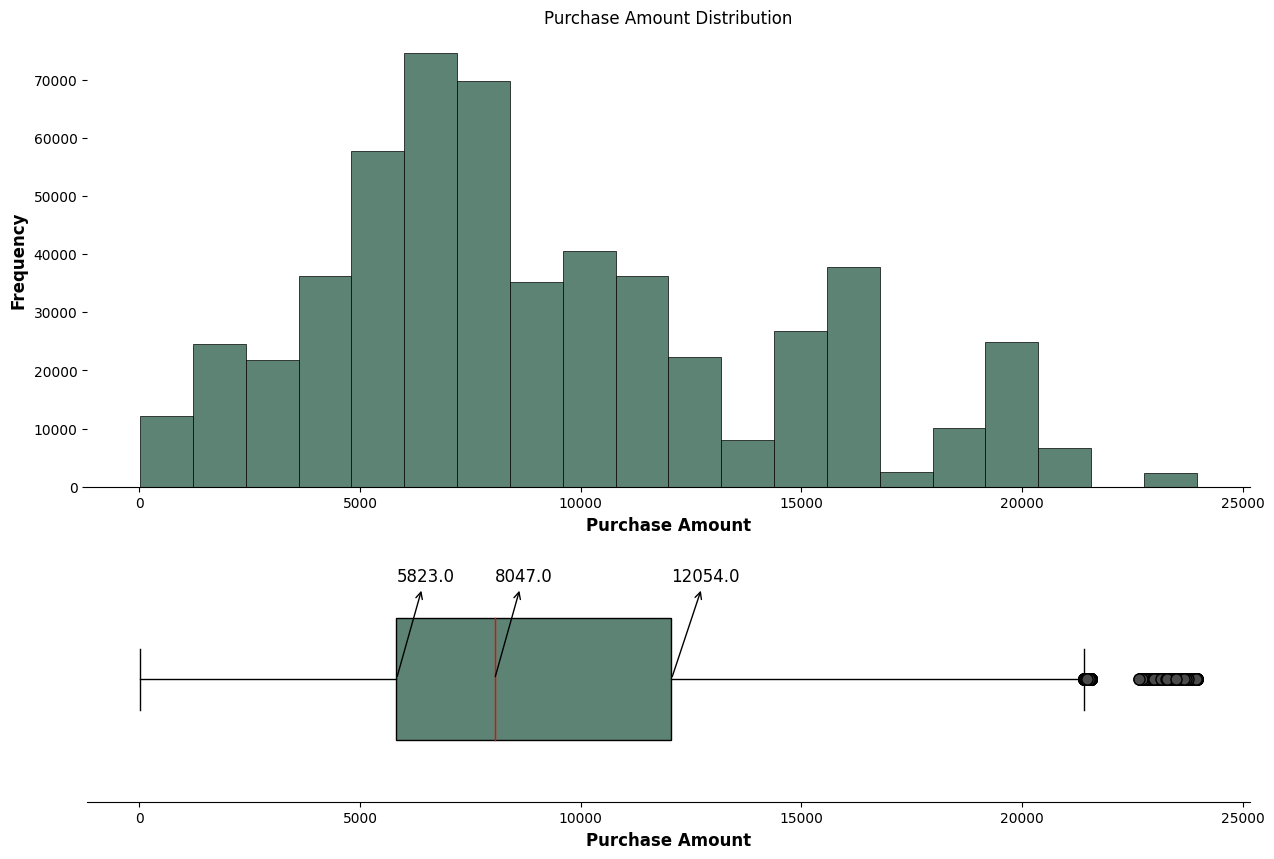

In [ ]:
# Univariate Analysis

import matplotlib.pyplot as plt

# Set up the figure and grid
fig, axs = plt.subplots(2, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [0.65, 0.35]})

# Plot histogram of purchase amounts
axs[0].hist(df['Purchase'], color='#5C8374', linewidth=0.5, edgecolor='black', bins=20)
axs[0].set_xlabel('Purchase Amount', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axs[0].set_title('Purchase Amount Distribution')
axs[0].spines['top'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['right'].set_visible(False)

# Plot box plot of purchase amounts
boxplot = axs[1].boxplot(x=df['Purchase'], vert=False, patch_artist=True, widths=0.5)
boxplot['boxes'][0].set(facecolor='#5C8374')
boxplot['medians'][0].set(color='red')
for flier in boxplot['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor="#4b4b4c")

axs[1].spines['top'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].set_yticks([])

# Add annotations for the box plot
quantiles = df['Purchase'].quantile([0.25, 0.5, 0.75])
for quantile, label in zip(quantiles, ['Q1', 'Median', 'Q3']):
    axs[1].annotate(f'{quantile:.1f}', xy=(quantile, 1), xytext=(quantile, 1.4),
                    fontsize=12, arrowprops=dict(arrowstyle="<-", lw=1, connectionstyle="arc,rad=0"))

# Add x-axis label to the box plot
axs[1].set_xlabel('Purchase Amount', fontweight='bold', fontsize=12)

plt.show()



In [ ]:
len(df.loc[df['Purchase'] > 21399,'Purchase'])
# Number of Outliers

2677

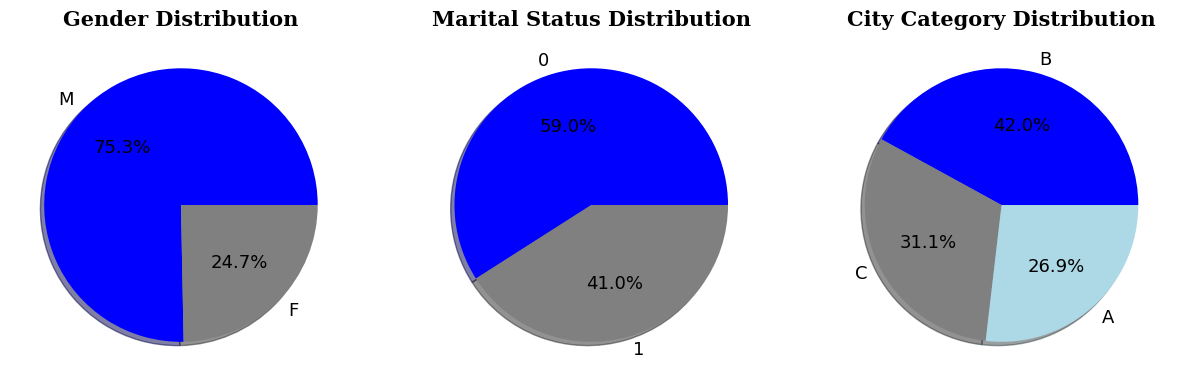

In [ ]:
# Gender, Marital Status and City Category Distribution


# Set up the figure and grid
fig, axs = plt.subplots(1, 3, figsize=(15, 12))

# Define color maps for pie charts
color_maps = [["blue", "gray"], ["blue", "gray"], ["blue", "gray", 'lightblue']]

# Plot pie chart for gender distribution
axs[0].pie(df['Gender'].value_counts().values, labels=df['Gender'].value_counts().index, autopct='%.1f%%',
           shadow=True, colors=color_maps[0], textprops={'fontsize': 13, 'color': 'black'})
axs[0].set_title('Gender Distribution', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

# Plot pie chart for marital status distribution
axs[1].pie(df['Marital_Status'].value_counts().values, labels=df['Marital_Status'].value_counts().index,
           autopct='%.1f%%', shadow=True, colors=color_maps[1], textprops={'fontsize': 13, 'color': 'black'})
axs[1].set_title('Marital Status Distribution', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

# Plot pie chart for city category distribution
axs[2].pie(df['City_Category'].value_counts().values, labels=df['City_Category'].value_counts().index,
           autopct='%.1f%%', shadow=True, colors=color_maps[2], textprops={'fontsize': 13, 'color': 'black'})
axs[2].set_title('City Category Distribution', fontdict={'family': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()



<ipython-input-31-1f37898954a6>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(temp.index, fontweight='bold')


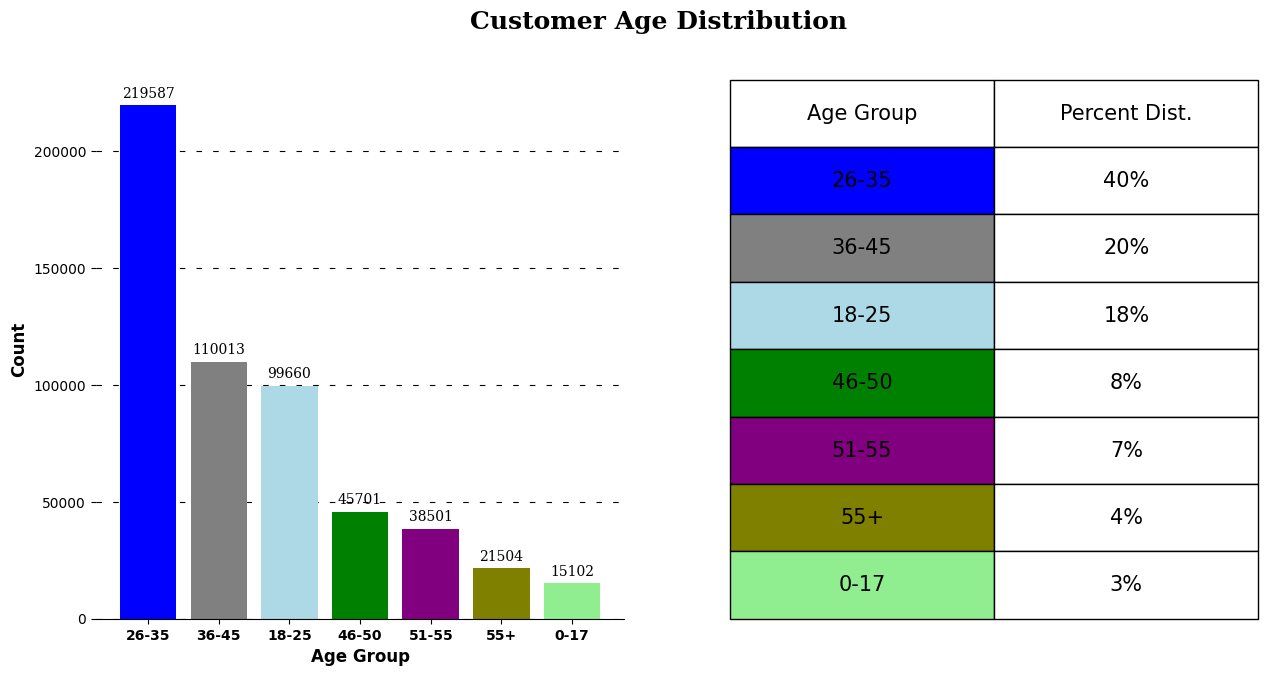

In [ ]:
# Customer Age Distribution


# Set up the figure and grid
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# creating bar chart for age distribution
ax0 = axs[0]
temp = df['Age'].value_counts()
color_map = ["blue", "gray", 'lightblue', 'green', 'purple', 'olive', 'lightgreen']
bars = ax0.bar(x=temp.index, height=temp.values, color=color_map, zorder=2)

# adding the value_counts
for i in temp.index:
    ax0.text(i, temp[i] + 5000, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

# adding grid lines
ax0.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# removing the axis lines
for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)

# adding axis label
ax0.set_ylabel('Count', fontweight='bold', fontsize=12)
ax0.set_xlabel('Age Group', fontweight='bold', fontsize=12)
ax0.set_xticklabels(temp.index, fontweight='bold')

# creating an info table for age
ax1 = axs[1]
age_info = [['26-35', '40%'], ['36-45', '20%'], ['18-25', '18%'], ['46-50', '8%'], ['51-55', '7%'], ['55+', '4%'],
             ['0-17', '3%']]
color_2d = [["blue", 'white'], ["gray", 'white'], ['lightblue', 'white'], ['green', 'white'], ['purple', 'white'],
            ['olive', 'white'], ['lightgreen', 'white']]
table = ax1.table(cellText=age_info, cellColours=color_2d, cellLoc='center', colLabels=['Age Group', 'Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(15)

# removing axis
ax1.axis('off')

# setting title for visual
fig.suptitle('Customer Age Distribution', font='serif', size=18, weight='bold')

plt.show()


The age group of 26-35 represents the largest share of Walmart's Black Friday sales, accounting for 40% of the sales. This suggests that the young and middle-aged adults are the most active and interested in shopping for deals and discounts .

The 36-45 and 18-25 age groups are the second and third largest segments, respectively, with 20% and 18% of the sales. This indicates that Walmart has a
diverse customer base that covers different life stages and preferences..

The 46-50, 51-55, 55+, and 0-17 age groups are the smallest customer segments , with less than 10% of the total sales each. This implies that Walmart may need to improve its marketing strategies and product offerings to attract more customers from these age groups, especially the seniors and the children.

<ipython-input-32-5d0f9a14b2d4>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(temp.index, fontweight='bold')


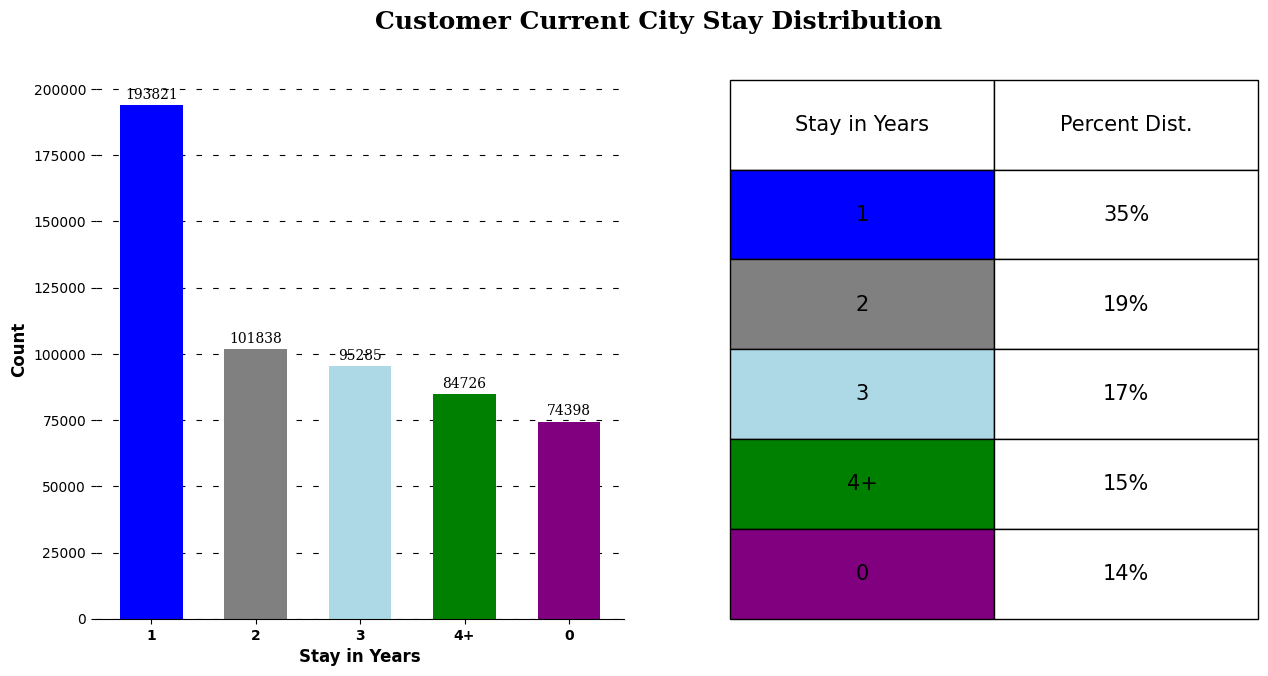

In [ ]:
# Customer Stay In current City Distribution


# Set up the figure and grid
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# creating bar chart for Customer Stay In current City
ax1 = axs[0]
temp = df['Stay_In_Current_City_Years'].value_counts()
color_map = ["blue", "gray", 'lightblue', 'green', 'purple']
bars = ax1.bar(x=temp.index, height=temp.values, color=color_map, zorder=2, width=0.6)

# adding the value_counts
for i in temp.index:
    ax1.text(i, temp[i] + 4000, temp[i], {'font': 'serif', 'size': 10}, ha='center', va='center')

# adding grid lines
ax1.grid(color='black', linestyle='--', axis='y', zorder=0, dashes=(5, 10))

# removing the axis lines
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)

# adding axis label
ax1.set_ylabel('Count', fontweight='bold', fontsize=12)
ax1.set_xlabel('Stay in Years', fontweight='bold', fontsize=12)
ax1.set_xticklabels(temp.index, fontweight='bold')

# creating an info table for Customer Stay In current City
ax2 = axs[1]
stay_info = [['1', '35%'], ['2', '19%'], ['3', '17%'], ['4+', '15%'], ['0', '14%']]
color_2d = [["blue", 'white'], ["gray", 'white'], ['lightblue', 'white'], ['green', 'white'], ['purple', 'white']]
table = ax2.table(cellText=stay_info, cellColours=color_2d, cellLoc='center',
                  colLabels=['Stay in Years', 'Percent Dist.'],
                  colLoc='center', bbox=[0, 0, 1, 1])
table.set_fontsize(15)

# removing axis
ax2.axis('off')

# setting title for visual
fig.suptitle('Customer Current City Stay Distribution', font='serif', size=18, weight='bold')
plt.show()


The data suggests that the customers are either new to the city or move frequently, and may have different preferences and needs than long-term residents.

The majority of the customers (49%) have stayed in the current city for one year or less . This suggests that Walmart has a strong appeal to newcomers who may be looking for affordable and convenient shopping options.
4+ years category (14%) customers indicates that Walmart has a loyal customer base who have been living in the same city for a long time.

The percentage of customers decreases as the stay in the current city increases which suggests that Walmart may benefit from targeting long-term residents for
loyalty programs and promotions

<ipython-input-42-8cf077a20199>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=category, y='Purchase', ax=ax, width=0.5, palette=color_map)
<ipython-input-42-8cf077a20199>:14: UserWarning: The palette list has more values (7) than needed (2), which may not be intended.
  sns.boxplot(data=df, x=category, y='Purchase', ax=ax, width=0.5, palette=color_map)
<ipython-input-42-8cf077a20199>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[category].unique(), fontweight='bold', fontsize=12)
<ipython-input-42-8cf077a20199>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=category, y='Purchase', ax=ax, width=0.5, palett

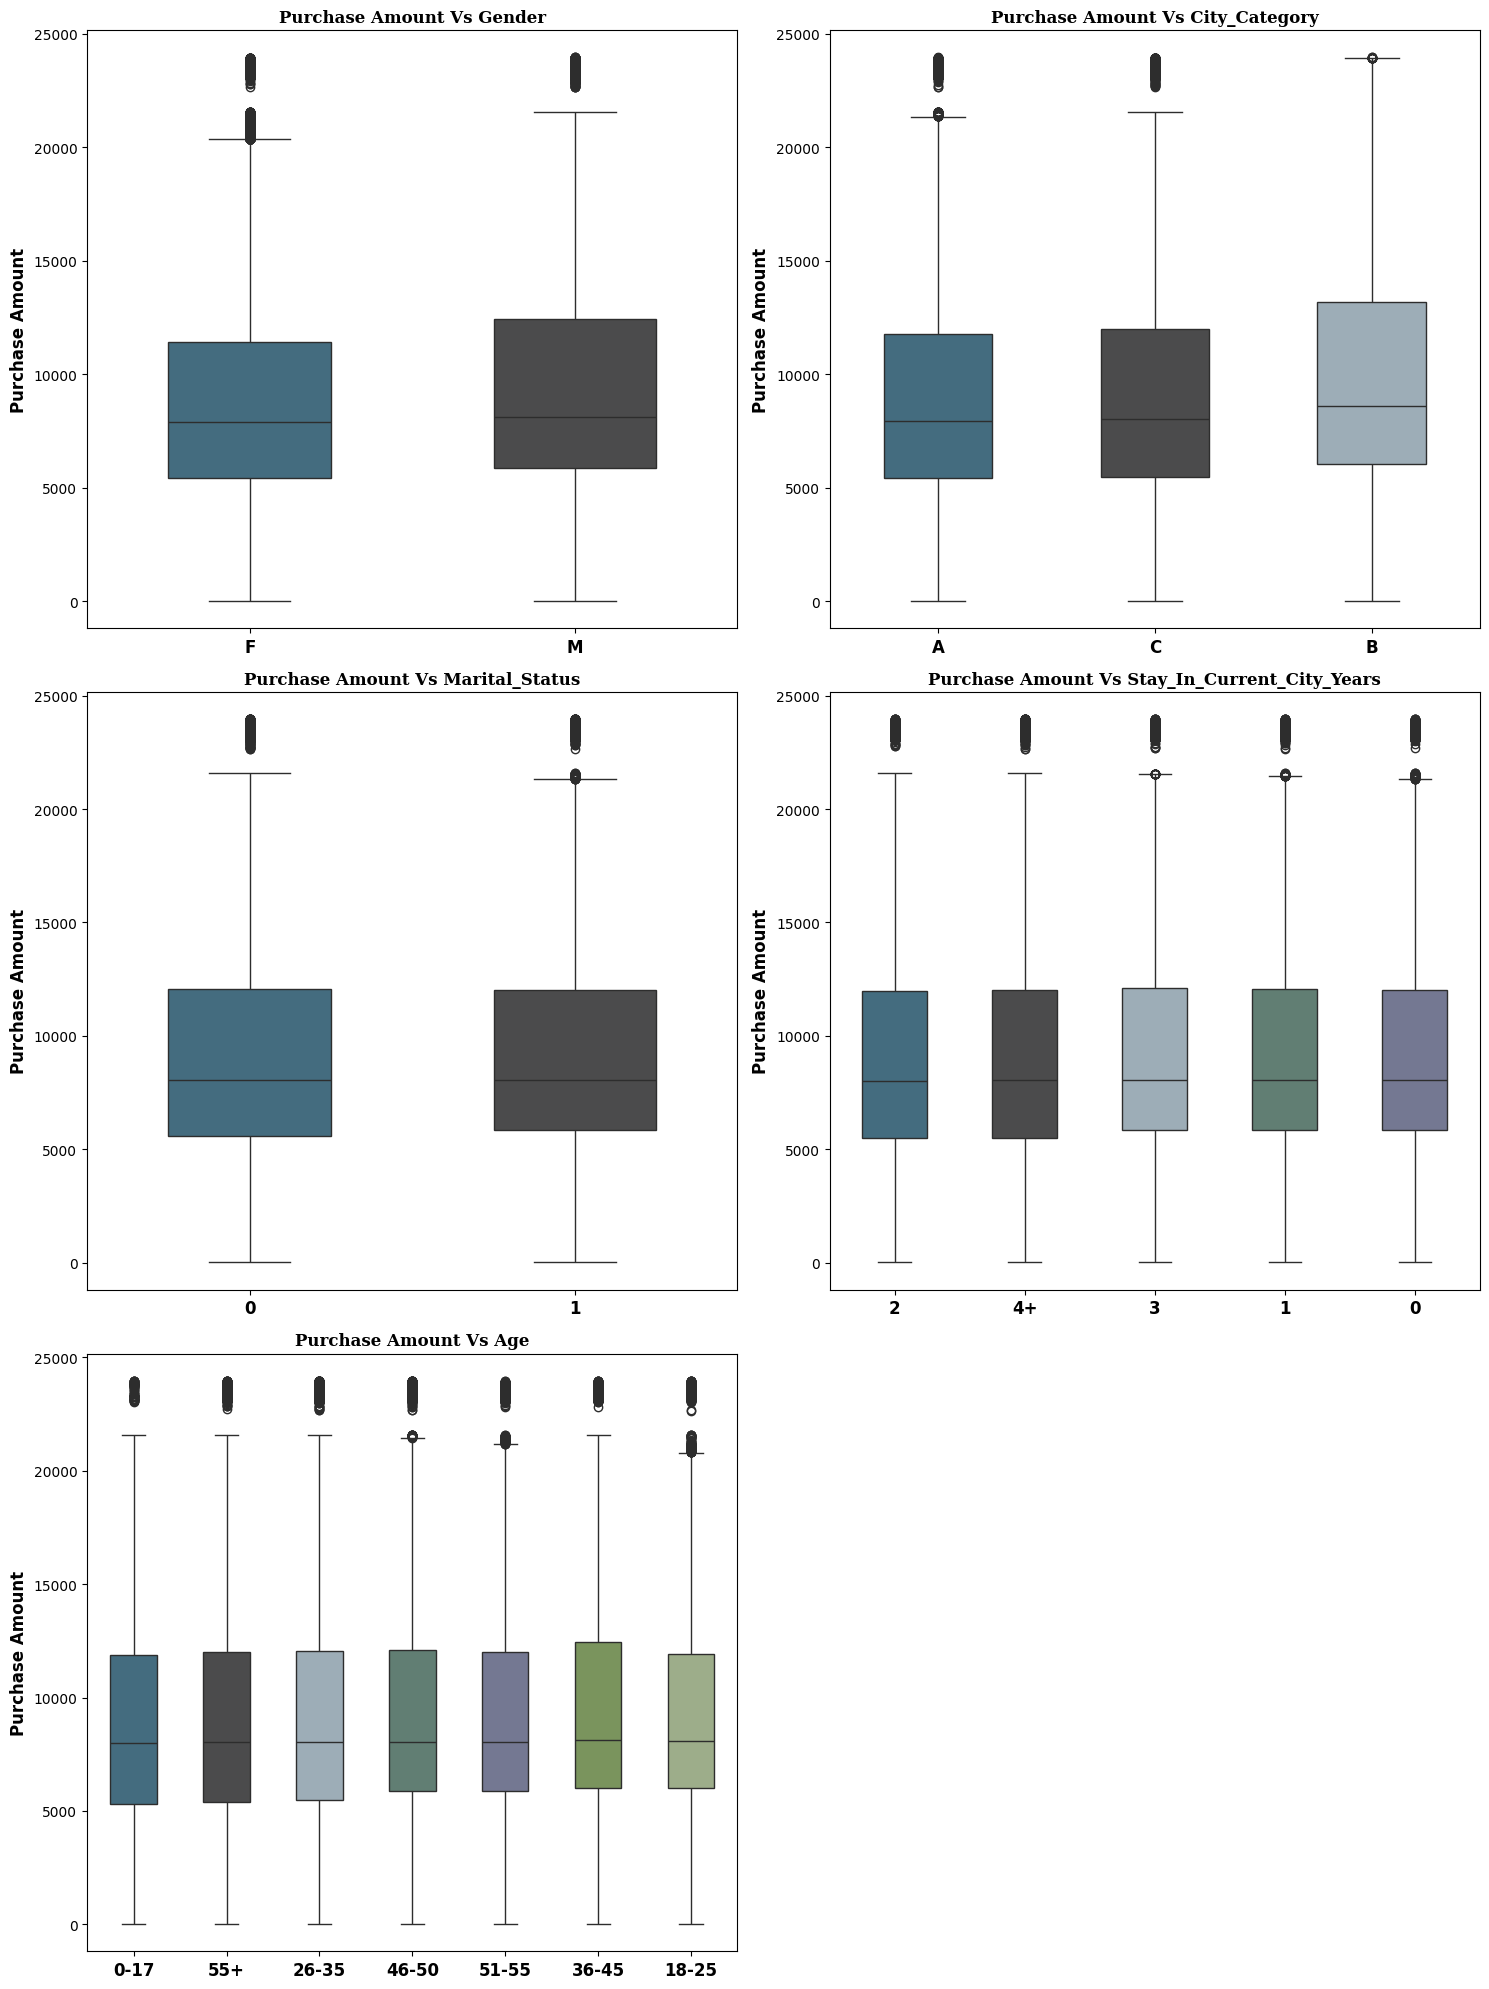

In [ ]:
# Exploring Purchase Patterns

# Setting the plot style
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

categories = ['Gender', 'City_Category', 'Marital_Status', 'Stay_In_Current_City_Years', 'Age']

for i, category in enumerate(categories):
    # Plot position
    ax = axs[i//2, i%2]  # Adjusting the subplot index calculation

    # Plot
    color_map = ["#3A7089", "#4b4b4c", '#99AEBB', '#5C8374', '#6F7597', '#7A9D54', '#9EB384']
    sns.boxplot(data=df, x=category, y='Purchase', ax=ax, width=0.5, palette=color_map)

    # Plot title
    ax.set_title(f'Purchase Amount Vs {category}', {'font': 'serif', 'size': 12, 'weight': 'bold'})

    # Customizing axis
    ax.set_xticklabels(df[category].unique(), fontweight='bold', fontsize=12)
    ax.set_ylabel('Purchase Amount', fontweight='bold', fontsize=12)
    ax.set_xlabel('')

# Remove empty boxes
for i in range(len(categories), len(axs.flat)):
    fig.delaxes(axs.flat[i])

plt.tight_layout()
plt.show()

Out of all the variables analysed above, it's noteworthy that the purchase amount remains relatively stable regardless of the variable under consideration. As
indicated in the data, the median purchase amount consistently hovers around 8,000 USD , regardless of the specific variable being examined

In [ ]:
#creating a df for purchase amount vs gender
temp = df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()
#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)
#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])
#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})
temp


,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


In [ ]:
#creating a function to calculate confidence interval
def confidence_interval(data,ci):
 #converting the list to series
 l_ci = (100-ci)/2
 u_ci = (100+ci)/2

 #calculating lower limit and upper limit of confidence interval
 interval = np.percen

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define your confidence_interval function here
def confidence_interval(data, confidence_level):
    # Your confidence interval calculation logic here
    pass

# defining a function for plotting the visual for given confidence interval
def plot(ci, df):
    # setting the plot style
    fig = plt.figure(figsize=(15, 8))
    gs = fig.add_gridspec(2, 2)
    # creating separate data frames for each gender
    df_male = df.loc[df['Gender'] == 'M', 'Purchase']
    df_female = df.loc[df['Gender'] == 'F', 'Purchase']
    # sample sizes and corresponding plot positions
    sample_sizes = [(100, 0, 0), (1000, 0, 1), (5000, 1, 0), (50000, 1, 1)]
    # number of samples to be taken from purchase amount
    bootstrap_samples = 20000
    male_samples = {}
    female_samples = {}

    for i, x, y in sample_sizes:
        male_means = []  # list for collecting the means of male sample
        female_means = []  # list for collecting the means of female sample
        for j in range(bootstrap_samples):
            # creating random 5000 samples of i sample size
            male_bootstrapped_samples = np.random.choice(df_male, size=i)
            female_bootstrapped_samples = np.random.choice(df_female, size=i)
            # calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)
            # appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        # storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means
        # creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data={'male_means': male_means, 'female_means': female_means})
        # plot position
        ax = fig.add_subplot(gs[x, y])

        # plots for male and female
        sns.kdeplot(data=temp_df, x='male_means', color="#3A7089", fill=True, alpha=0.5, ax=ax, label='Male')
        sns.kdeplot(data=temp_df, x='female_means', color="#4b4b4c", fill=True, alpha=0.5, ax=ax, label='Female')
        # calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means, ci)
        f_range = confidence_interval(female_means, ci)
        # plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x=k, ymax=0.9, color="#3A7089", linestyle='--')
        for k in f_range:
            ax.axvline(x=k, ymax=0.9, color="#4b4b4c", linestyle='--')
        # removing the axis lines
        for s in ['top', 'left', 'right']:
            ax.spines[s].set_visible(False)
        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        # setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}', {'font': 'serif', 'size': 11, 'weight': 'bold'})
        plt.legend()

    # setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18, weight='bold')
    plt.show()

    return male_samples, female_samples





In [ ]:
def confidence_interval(data, confidence_level):
    # Your confidence interval calculation logic here
    # For example:
    mean = np.mean(data)
    std_dev = np.std(data)
    n = len(data)
    z_score = 1.96  # For 95% confidence level

    margin_of_error = z_score * (std_dev / np.sqrt(n))
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error

    return lower_bound, upper_bound


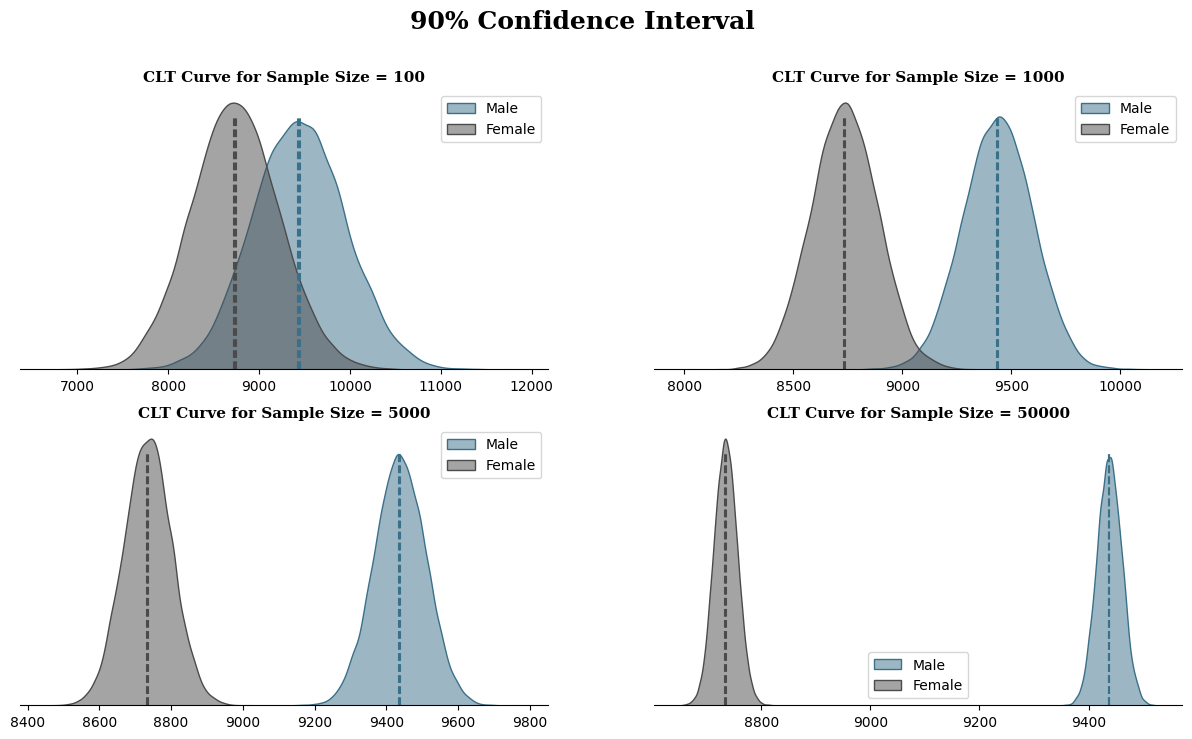

In [ ]:
m_samp_90, f_samp_90 = plot(90, df)

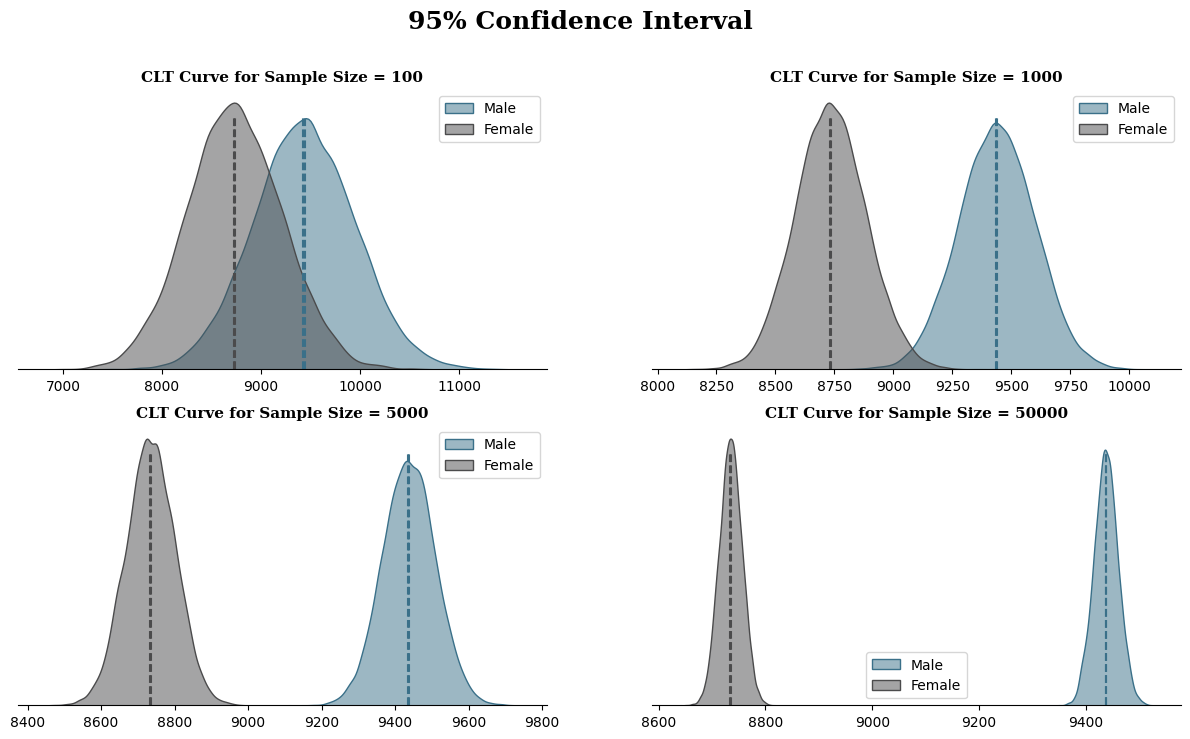

In [ ]:
m_samp_95,f_samp_95 = plot(95, df)

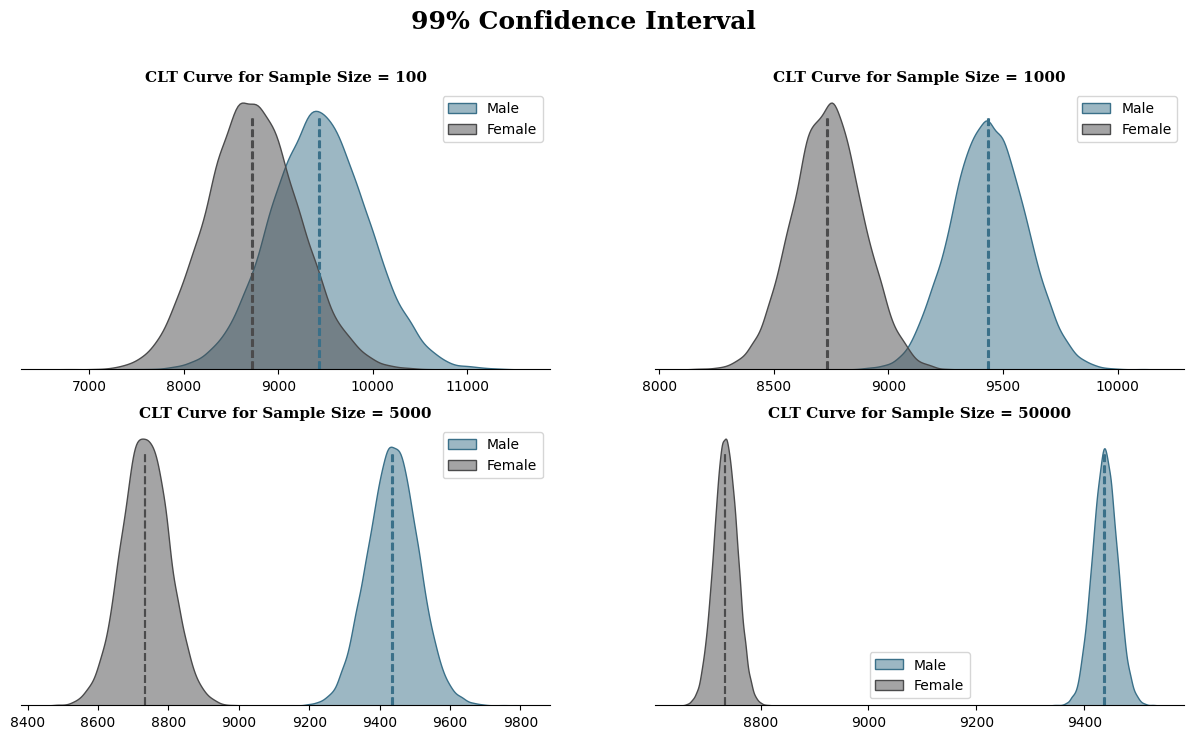

In [ ]:
m_samp_99,f_samp_99 = plot(99,df)

In [ ]:
#creating a df for purchase amount vs marital status
temp = df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()
#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)
#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)
#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])
temp


,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,0,3008927447,324731,3.01,0.59,9266.0
1,1,2086885295,225337,2.09,0.41,9261.0


Recommendations

1. Target Male Shoppers
Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing
strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.
2. Focus on 26 - 45 Age Group
With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.This could
include offering exclusive deals on products that are popular among this age group.
3. Engage Younger Shoppers
Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them
more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.
4. Customer Segmentation
Since customers in the 18 - 25, 26 - 35, and 46 - 50 age groups exhibit similar buying characteristics, and so do the customers in 36 - 45 and 55+, Walmart can optimize
its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.
5. Enhance the 51 - 55 Age Group Shopping Experience
Considering that customers aged 51 - 55 have the highest spending per transaction, Walmart offer them exclusive pre-sale access, special discount or provide
personalized product recommendations for this age group. Walmart can also introduce loyalty programs specifically designed to reward and retain customers in the 51 -
55 age group.
6. Post-Black Friday Engagement
After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase
customer retention and encourage repeat business throughout the holiday season and beyond.
